In [22]:
import numpy as np
import matplotlib.pyplot as plt
from kalman_filter import KalmanFilter

### Aufgabe 3

In [55]:
def correlate(x, y): 
    """
    correlates x with y
    
    ! moves y !
    """
    rxy = np.correlate(y, x, 'full')
    lags = np.arange(-len(y)+1, len(x), dtype=int)[::-1]

    return np.column_stack((lags, rxy))

In [58]:
S1 = np.array([-10, 26, -8, -24], dtype=float)
S2 = np.array([-17, -11, 22, -9, -30, -17, -15, 18],dtype=float)

r12 = correlate(S2, S1)
r12[:,1] /= len(S1)
print(r12)

[[   7.   -45. ]
 [   6.   154.5]
 [   5.   -91. ]
 [   4.  -113.5]
 [   3.   -48.5]
 [   2.    48.5]
 [   1.   368.5]
 [   0.   -19. ]
 [  -1.  -220.5]
 [  -2.   100. ]
 [  -3.   102. ]]


In [59]:
m = 1
fs = 1500
a = 0.1

t = m/fs
v = a/t

print(f't = {t} s')
print(f'v = {v} mm/s')

t = 0.0006666666666666666 s
v = 150.0 mm/s


In [60]:
print(0.5**3/3 - (-0.5)**3/3)

0.08333333333333333
0.08333333333333333


### Aufgabe 4

In [17]:
N_FIR = 0   # filter ordnung
N_Iter = 2  # lms iterationen
mu_max = 1 / (N_FIR + 1) # maximale learnrate

enable_print = True

# learnrate
mu = 0.1*mu_max
mu = 0.1

# init vektoren
b = np.zeros(N_FIR + 1)
e = np.zeros(N_Iter)
y = np.zeros(N_Iter)

# system, welches indentifiziert werden soll
#h = np.array([0, 2], dtype=float)
#d = np.zeros(N_Iter)
#z = np.array([-0.1, 0.1])

d = np.array([-4.1, -1.9, -1.5, 2.5])

# input signal
x = np.array([-2.0, -1.0, -0.7, 1.3], dtype=float)
x = np.array([x[start:start+N_FIR+1] for start in np.arange(len(x)-N_FIR)])
x = x[:, ::-1]

print(x)

# lms
for n in range(N_Iter):
    # calc y[n]
    y[n] = b@x[n]

    # calc e[n]
    e[n] = d[n] - y[n]
    
    if enable_print:
        print(f'Iteration {n}:')
        print(f'\tx[{n}] = {x[n]}')
        print(f'\tb[{n}] = {b}')
        print(f'\ty[{n}] = {y[n]}')
        print(f'\td[{n}] = {d[n]}')
        print(f'\te[{n}] = {e[n]}')
        print()
    
    # calc b[n]
    b += 2*mu*e[n]*x[n]

print(f'b = {b}')

[[-2. ]
 [-1. ]
 [-0.7]
 [ 1.3]]
Iteration 0:
	x[0] = [-2.]
	b[0] = [0.]
	y[0] = 0.0
	d[0] = -4.1
	e[0] = -4.1

Iteration 1:
	x[1] = [-1.]
	b[1] = [1.64]
	y[1] = -1.64
	d[1] = -1.9
	e[1] = -0.26

b = [1.692]


In [15]:
bls = np.linalg.pinv(x)@d
print(bls)

[2.00557103]


### Aufgabe 5

In [21]:
A = np.array([[1, (1+T)*5] for T in range(5)], dtype=float)
c = np.array([333.7, 337.7, 339.4, 342.5, 346.6])

bls = np.linalg.pinv(A)@c
print(bls)

print(bls[0] + 20*bls[1])

[330.8     0.612]
343.03999999999996


### Aufgabe 6

Schätzung    = [18.5        18.93333333 18.9        19.7       ]
Gain         = [0.5        0.33333333 0.25       0.2       ]
Unsicherheit = [2.         1.33333333 1.         0.8       ]


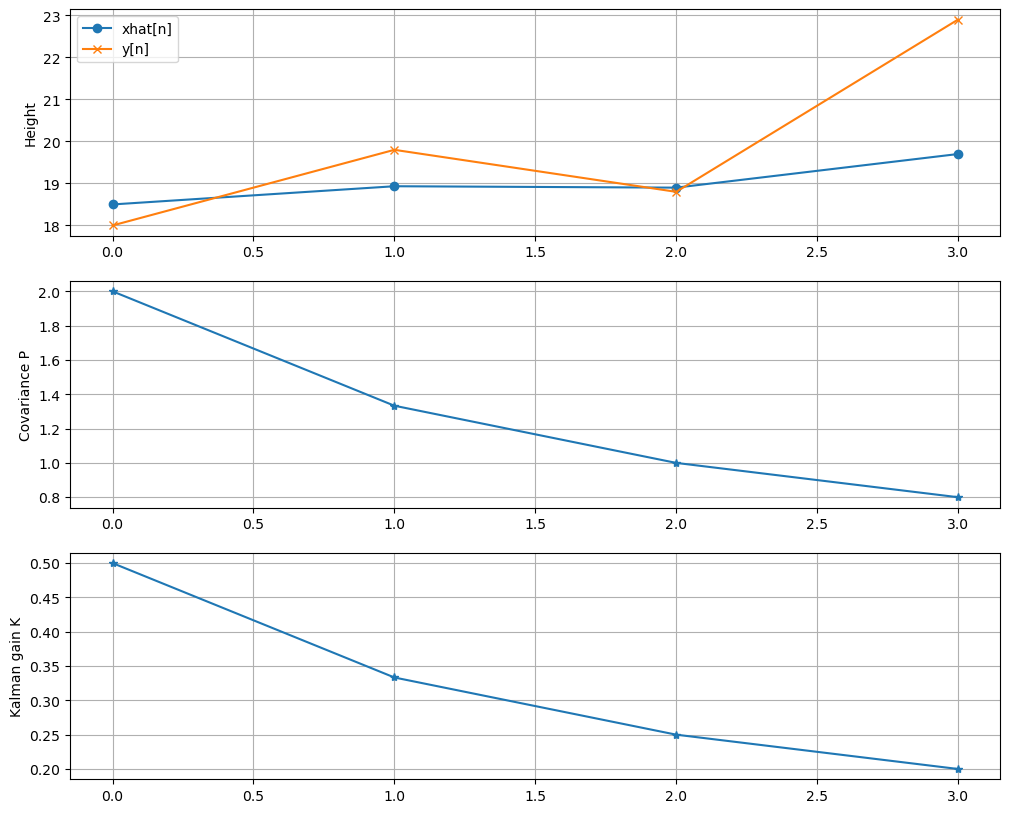

In [28]:
# Measurement vector
y = np.array([18.0, 19.8, 18.8, 22.9])
sigma = 2

# Kalman Filter
A = np.array([[1]], dtype=float)
B = np.array([[0]], dtype=float)
C = np.array([[1]], dtype=float)
x0 = np.array([[19]], dtype=float)
#P0 = A @ np.diag([10000, 1]) @ A.T
P0 = np.array([[4]], dtype=float)
R = sigma**2
Q = 0.000

kf = KalmanFilter(A, B, C, Q, R, x0, P0)

xhat = np.zeros_like(y)
P = np.zeros_like(y)
K = np.zeros_like(y)

for n in range(len(y)):
    kf.kalman_update(y[n], 0)
    xhat[n] = kf.x[0,0]
    P[n] = kf.P[0,0]
    K[n] = kf.K[0,0]

print(f'Schätzung    = {xhat}')
print(f'Gain         = {K}')
print(f'Unsicherheit = {P}')

# Visualization
plt.figure(1, figsize=(12,10))
plt.subplot(311)
plt.plot(xhat, '-o')
plt.plot(y, '-x')
#plt.plot(T, '-g')
plt.ylabel('Height')
plt.grid(True)
plt.legend(["xhat[n]", 'y[n]'])

plt.subplot(312)
plt.plot(P, '-*')
plt.ylabel('Covariance P')
plt.grid(True)

plt.subplot(313)
plt.plot(K, '-*')
plt.ylabel('Kalman gain K')
plt.grid(True)
plt.show()